<a href="https://colab.research.google.com/github/Yusuf-xx/Predict-Wheat-Type/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
colnames=['AREA','PERIMETER','COMPACTNESS','LENGTH','WIDTH','ASSYMMETRY_COEFFICIENT','GROOVE_LENGTH','TYPE'] 
df = pd.read_csv('seeds_dataset.txt',  sep='\t', names= colnames )

In [ ]:
df.head()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [ ]:
df = df.dropna()

In [ ]:
train_set = df.iloc[:,:7]
test_set = df.iloc[:,7:]
test_set.head()

,TYPE
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
test_set = pd.get_dummies(test_set.TYPE)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_set, test_set,train_size=0.80, test_size=0.20)

In [ ]:
y_train.head()

,1.0,2.0,3.0
88,0,1,0
195,0,0,1
2,1,0,0
41,1,0,0
46,1,0,0


In [ ]:
tf.random.set_seed = 30

model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(7, activation='relu'),
              tf.keras.layers.Dense(7, activation='relu'),
              tf.keras.layers.Dense(7, activation='relu'),
              tf.keras.layers.Dense(3,activation='softmax')

])

In [ ]:
model_1.compile(loss= tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.RMSprop(learning_rate= 0.001),
                metrics = ['accuracy'])

In [ ]:
history_1 = model_1.fit(X_train,y_train, epochs=49)

Epoch 1/49
5/5 [==============================] - 1s 3ms/step - loss: 1.1071 - accuracy: 0.1321
Epoch 2/49
5/5 [==============================] - 0s 3ms/step - loss: 1.0617 - accuracy: 0.1698
Epoch 3/49
5/5 [==============================] - 0s 3ms/step - loss: 1.0365 - accuracy: 0.3082
Epoch 4/49
5/5 [==============================] - 0s 4ms/step - loss: 1.0152 - accuracy: 0.3585
Epoch 5/49
5/5 [==============================] - 0s 4ms/step - loss: 0.9943 - accuracy: 0.4151
Epoch 6/49
5/5 [==============================] - 0s 4ms/step - loss: 0.9732 - accuracy: 0.4528
Epoch 7/49
5/5 [==============================] - 0s 3ms/step - loss: 0.9572 - accuracy: 0.4780
Epoch 8/49
5/5 [==============================] - 0s 3ms/step - loss: 0.9432 - accuracy: 0.4717
Epoch 9/49
5/5 [==============================] - 0s 4ms/step - loss: 0.9327 - accuracy: 0.4528
Epoch 10/49
5/5 [==============================] - 0s 3ms/step - loss: 0.9210 - accuracy: 0.4528
Epoch 11/49
5/5 [======================

In [ ]:
model_1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5971 - accuracy: 0.9000


[0.5971323847770691, 0.8999999761581421]

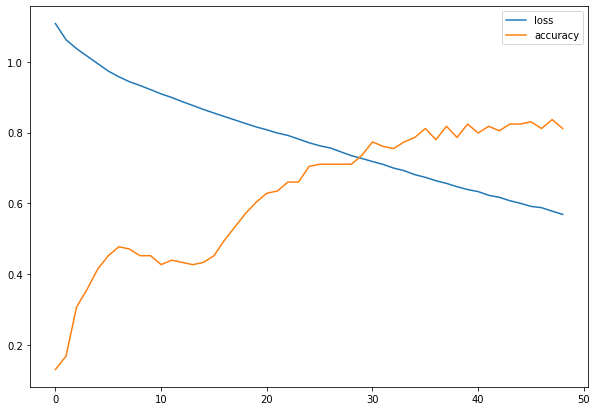

In [ ]:
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [ ]:
y_probs = model_1.predict(X_test)
y_preds = y_probs.argmax(axis=1) 
y_preds

array([1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2])

In [ ]:
y_test, y_preds

(     1.0  2.0  3.0
 76     0    1    0
 31     1    0    0
 163    0    0    1
 29     1    0    0
 56     1    0    0
 67     1    0    0
 141    0    0    1
 177    0    0    1
 181    0    0    1
 53     1    0    0
 54     1    0    0
 204    0    0    1
 21     1    0    0
 13     1    0    0
 85     0    1    0
 20     1    0    0
 167    0    0    1
 164    0    0    1
 151    0    0    1
 162    0    0    1
 40     1    0    0
 207    0    0    1
 192    0    0    1
 171    0    0    1
 84     0    1    0
 190    0    0    1
 5      1    0    0
 113    0    1    0
 22     1    0    0
 205    0    0    1
 155    0    0    1
 194    0    0    1
 208    0    0    1
 187    0    0    1
 134    0    1    0
 122    0    1    0
 191    0    0    1
 180    0    0    1
 103    0    1    0
 175    0    0    1,
 array([1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 2, 0, 2,
        2, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2]))